In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as integrate
import random

$\textbf{Problema 1:}$

a) El tener eventos disjuntos es una relación que se establece entre conjuntos de elementos. Los eventos mutuamente disjuntos no poseen elementos en común y por tanto, la ocurrencia de eventos disjuntos no puede ser simultanea. 

Por otro lado, la relación entre eventos independientes tienen un enfoque más probabilistico. Los eventos independientes pueden superponerse y no intervienen entre sí en sus probabilidades.

Un ejemplo astronómico de eventos disjuntos:

-Evento 1: Observar una supernova tipo I
-Evento 2: Que la supernova tenga Hidrógeno en su atmosfera

Un ejemplo astronómico de eventos independientes:

-Evento 1: Tener una cierta cantidad de cuentas asociadas a fotones provenientes de una fuente (para una frecuencia dada)
-Evento 2: Tener una cierta cantidad de cuentas asociadas a el bias instrumental (en la misma frecuencia).

b) A partir de la figura:

<img src="files/ACBC.png">

Tenemos que $A^c \cap B^c= \Omega - A \cup B$, de manera que se tiene:
$$P(A^c \cap B^c)=P( \Omega - A \cup B) \\ =1- P(A+B + A \cap B) \\ = 1- P(A) - P(B) + P(AB) \\ = 1- P(A) - P(B) + P(A)P(B) \\ = (1-P(A)) (1-P(B)) = P(A^c) P(B^c)$$

Donde usamos que  $P(A \cap B)= P(A) P(B)$ (independencia) y otras propiedades de probabilidades en conjuntos como: $P(A^c)=1-P(A)$ (idem para B). Con ello terminamos demostrando que $P(A^c \cap B^c)=P(A^c) P(B^c)$ (independencia de $A^c \ y \ B^c$).

$\textbf{Problema 2}$

a) Dado que tenemos un sistema de encuesta con sólo dos posibles respuestas, cada una con cierta probabilidad $r$(elegir la primera respuesta) y $(1-r)$(elegir la segunda respuesta) de ocurrir, entonces la distribución que se tiene para X (el número de veces que la gente escoge la primera respuesta) es binomial. A partir del sistema de encuesta formulado por el ayudante tenemos los parámetros:

n: número total de personas que participaron en la encuesta.
X=18: número de personas que eligieron la primera respuesta (quedarse con su elección inicial en el problema de Monty Hall).
r: probabilidad de que las personas eligan la primera respuesta.

b) Asumiendo $r=0.5$ podemos calcular la probabilidad $P(X=18|r=0.5) = \left(\frac{33}{18}\right) r^{18} (1-r)^{15} \approx 0.12$ (compilar la línea inferior).

In [4]:
float(math.factorial(33))/(float(math.factorial(18))*math.factorial(15))*(0.5)**33

0.12074111960828303

Podemos simular un proceso de votación (en este caso repitiendo 1000 veces la misma votación de 33 votos) para comprobar nuestros resultados.

(array([   3.,    0.,   11.,    0.,   25.,    0.,   57.,    0.,   73.,
           0.,   93.,    0.,  113.,    0.,  150.,    0.,  139.,    0.,
         110.,    0.,   86.,    0.,   64.,    0.,   37.,    0.,   23.,
           0.,    8.,    0.,    5.,    0.,    2.,    1.]),
 array([  9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
         13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
         18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
         22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ]),
 <a list of 34 Patch objects>)

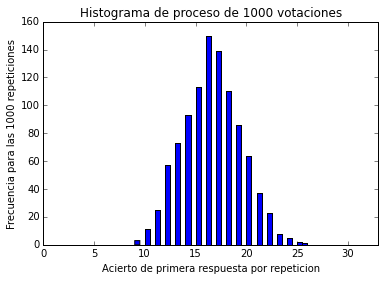

In [31]:
suma=np.zeros((1000))
votacion= np.zeros((1000,33))
for i in range(1000):
    votacion[i]= [random.randint(0, 1) for x in range(33)]

for i in range(1000):
    suma[i]=sum(votacion[i])

plt.title("Histograma de proceso de 1000 votaciones")
plt.xlabel("Acierto de primera respuesta por repeticion")
plt.ylabel("Frecuencia para las 1000 repeticiones")
plt.xlim(0,33)
plt.hist(suma, bins=34)

A partir de él, podemos observar una distribución de Poisson, el cual se formó mediante un proceso de votación con distribución binomial. Adicionalmente, obtenemos $P(X=18|r=0.5) \approx 0.12 $ tal y como esperábamos (comprobar con las líneas de código superiores e inferiores).

In [9]:
prob=float(len(np.where(suma==18.0)[0]))/len(suma)
print prob

0.121


c) Para comparar comparar la hipótesis de que la mayor cantidad de la gente prefiere quedarse con su respuesta inicial necesitamos la distribución de r dados nuestros datos observados $X=x$, con $x=18$. Para obtener esto podemos usar el teorema de Bayes, lo cual implica conocer $P(r)$ (la distribución intrínseca de probabilidad de que r tome un valor dado entre 0 y 1). Por enunciado nos dicen que $P(r)=1$, lo que se refiere a que $r$ distribuye uniformemente.

La integral de la PDF(r) a lo largo del rango de r [0,1] da igual a 1.0
Adicionalmente, podemos graficar la PDF(r)


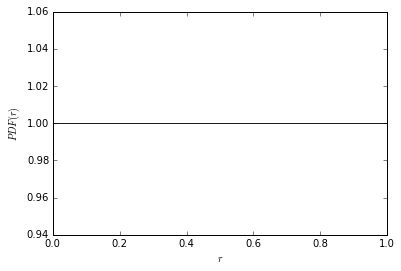

In [18]:
rvec=np.linspace(0,1,100)
prvec=np.ones((100))
pr=1.
int_pr=integrate.quad(lambda x: pr,0,1)

plt.title("")
plt.xlabel(r'$r$')
plt.ylabel(r'$PDF(r)$')
plt.plot(rvec,prvec)
print 'La integral de la PDF(r) a lo largo del rango de r [0,1] da igual a',int_pr[0]
print 'Adicionalmente, podemos graficar la PDF(r):'

Usando lo anterior podemos escribir $PDF(r|X=18)={ p(X|r) P(r) \over \int P(X|r') P(r') dr'}$. Con esto tenemos la $PDF(r)$ y podemos obtener la $CDF(r)=\int^r_{-\infty} PDF(r') dr'$. A partir de esto podemos graficar tanto la PDF(r|X) como la CDF(r|X):

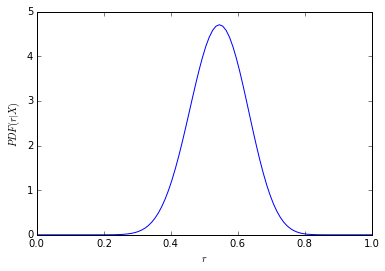

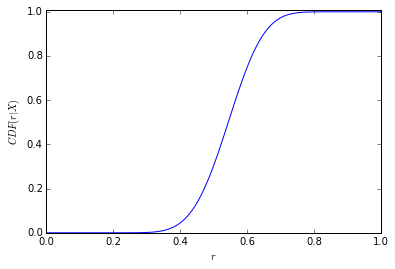

In [24]:
den=integrate.quad(lambda r: float(math.factorial(33))/(float(math.factorial(18))*math.factorial(15))*(r)**18*(1-r)**15,0,1)[0]
def prX(r):
    return float(math.factorial(33))/(float(math.factorial(18))*math.factorial(15))*r**18*(1-r)**15/den

CDF_plot=np.zeros((len(rvec)))
plt.xlabel(r'$r$')
plt.ylabel(r'$PDF(r|X)$')
plt.plot(rvec,prX(rvec))
plt.show()
def CDF(r):
    return integrate.quad(lambda x: prX(x),0,r)[0]
for i in range(len(rvec)):
    CDF_plot[i]=CDF(rvec[i])

plt.xlabel(r'$r$')
plt.ylim([0,1.01])
plt.ylabel(r'$CDF(r|X)$')
plt.plot(rvec,CDF_plot)

En base al gráfico de la PDF(r|X) podemos decir que, a partir de nuestros datos observados (X=18), el peak de nuestra PFD(r|X) se encuentra centrado hacia $r>0.5$. Adicionalmente, del gráfico de la CDF(r|X) podemos corroborar que CDF(r|X) llega a 1 para $r \rightarrow 1$, y podemos notar que la mayor parte de la probabilidad acumulada se encuentra en zonas con $r>0.5$. Podemos corroborar esto haciendo la comparación de: $\int^{0.5}_0 PDF(r|X)$ y $\int^1_{0.5} PDF(r|X)$ (lo cual podemos hacer usando la línea de código de abajo).

In [28]:
r_b=integrate.quad(lambda x: prX(x),0,0.5)[0]
r_a=integrate.quad(lambda x: prX(x),0.5,1)[0]

print 'La probabilidad acumulada para r<0.5 es', r_b
print 'La probabilidad acumulada para r>0.5 es', r_a

La probabilidad acumulada para r<0.5 es 0.303795680637
La probabilidad acumulada para r<0.5 es 0.696204319363


Con lo cual corroboramos nuestra hipótesis de que nuestros datos indican que la gente tiende a quedarse con su decición inicial en el problema de Monty Hall.

In [24]:
hist

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
          9.,   10.,   26.,   45.,   68.,   94.,  137.,  130.,  126.,
         93.,   98.,   72.,   42.,   28.,   11.,    7.,    2.,    1.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.])